In [35]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [36]:
x = torch.rand(5,3)
y = torch.ones(5,3, dtype=torch.long)

if torch.cuda.is_available():
    device = torch.device("cuda")
    y = torch.ones_like(x, device=device)
    x = x.to(device)
    z=x+y
    print(z)
    print(z.to("cpu",torch.double))

tensor([[1.0432, 1.9079, 1.2710],
        [1.9078, 1.3186, 1.5638],
        [1.1728, 1.5822, 1.4928],
        [1.6787, 1.7050, 1.8900],
        [1.5898, 1.0618, 1.7275]], device='cuda:0')
tensor([[1.0432, 1.9079, 1.2710],
        [1.9078, 1.3186, 1.5638],
        [1.1728, 1.5822, 1.4928],
        [1.6787, 1.7050, 1.8900],
        [1.5898, 1.0618, 1.7275]], dtype=torch.float64)


In [37]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,),(0.5,))])

trainset = torchvision.datasets.FashionMNIST('data',
  download = True,
  train = True,
  transform = transform  
)

testset = torchvision.datasets.FashionMNIST('data',
  download = True,
  train = False,
  transform = transform  
)

In [38]:
!pwd

/content


In [39]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                      shuffle=True, num_workers=10)

testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                        shuffle=False, num_workers=5)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [40]:
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# helper function to show an image
# (used in the `plot_classes_preds` function below)
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


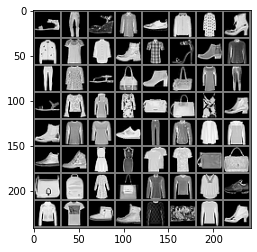

In [41]:
dataiter = iter(trainloader)
images, labels= dataiter.next()

matplotlib_imshow(torchvision.utils.make_grid(images))

In [42]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [43]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [44]:
import torch.nn as nn
import torch.nn.functional as F

class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784,256)
    self.fc2 = nn.Linear(256,128)
    self.fc3 = nn.Linear(128,64)
    self.fc4 = nn.Linear(64,10)
    
  def forward(self,x):
    x = x.view(x.shape[0], -1)

    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.log_softmax(self.fc4(x), dim=1)

    return x  

In [45]:
import torch.optim as optim

model = Classifier()

model.cuda()

criterion = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(),lr=0.01)

In [46]:
model.fc1.weight

Parameter containing:
tensor([[-1.9975e-02,  2.8479e-02,  1.2054e-02,  ..., -2.0936e-02,
          3.1090e-03, -1.1996e-02],
        [-2.9540e-02,  3.5702e-02, -4.1382e-03,  ...,  3.4443e-04,
         -3.2000e-02, -2.7413e-03],
        [ 7.2420e-03, -1.1829e-02, -9.6785e-03,  ...,  3.4454e-02,
          9.5585e-03, -2.9959e-02],
        ...,
        [-4.1785e-03, -1.1967e-02,  3.5127e-02,  ...,  3.3600e-02,
         -4.3963e-05, -3.5512e-02],
        [ 1.1149e-02,  2.2723e-02, -2.2324e-02,  ...,  2.0650e-02,
         -1.5252e-02,  3.0942e-02],
        [-3.4827e-03,  3.3931e-02, -2.4221e-02,  ...,  2.0308e-02,
          2.8032e-02,  3.2321e-02]], device='cuda:0', requires_grad=True)

In [47]:
images, labels = iter(trainloader).next()
log_ps = model(images.cuda())
loss = criterion(log_ps, labels.cuda())

loss.backward()

print(model.fc2.weight.grad)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


tensor([[-7.2587e-04, -3.8816e-05, -4.0496e-04,  ..., -4.9529e-04,
         -2.4216e-04, -1.2305e-04],
        [ 1.4721e-03,  9.2971e-05,  9.8674e-04,  ...,  2.6504e-04,
          1.8925e-04,  1.7052e-04],
        [-2.2655e-04, -7.4720e-05, -2.3349e-04,  ..., -5.2004e-06,
         -3.6685e-04, -3.0191e-05],
        ...,
        [-6.4282e-04, -1.1262e-05, -4.6739e-05,  ..., -7.9140e-04,
         -1.0063e-04, -4.9550e-05],
        [-4.9421e-05,  6.1105e-04,  1.0376e-03,  ...,  4.0246e-04,
          9.6072e-05,  3.2804e-05],
        [ 4.8079e-04, -2.6331e-05, -3.9484e-04,  ..., -7.7798e-04,
          2.7157e-04,  1.2100e-04]], device='cuda:0')


In [48]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('runs/fashion_mnist_experiment_1')
writer.close()

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


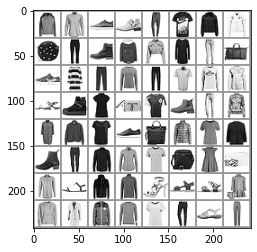

In [49]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

img_grid= torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)
writer.add_image('four_fashion_minst_images', img_grid)

In [50]:
writer.add_graph(model, images.cuda())
writer.close()

In [51]:
epochs = 5

for e in range(epochs):
  running_loss = 0
  model.train()
  for images, labels in trainloader:
    log_ps = model(images.cuda())
    loss = criterion(log_ps, labels.cuda())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss +=loss.item()
  else:
    print(f"Training loss: {running_loss/1000}",end =" ")
    writer.add_scalar('training_loss', running_loss/1000)
  
  model.eval()
  with torch.no_grad():
    total = 0
    correct = 0
    for images, labels in testloader:
      log_ps = model(images.cuda()).cpu()
      mx_index = torch.argmax(log_ps,dim=1)
      total+=labels.numel()
      correct += sum(mx_index == labels).item()
    print(f"Test Accuracy {correct/total *100:.2f}")
writer.close()


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Training loss: 1.2328188588917255 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Test Accuracy 73.64
Training loss: 0.5944304436445236 Test Accuracy 76.00
Training loss: 0.5087039929777384 Test Accuracy 78.83
Training loss: 0.45951859816908835 Test Accuracy 81.55
Training loss: 0.42733025148510934 Test Accuracy 82.50


In [52]:
def view_classify(img, ps, version="Fashion"):
  ps = ps.data.numpy().squeeze()
  fig, (ax1, ax2) = plt.subplots(figsize=(6,9),ncols=2)
  ax1.imshow(img.resize_(1,28,28).numpy().squeeze())
  ax1.axis("off")
  ax2.barh(np.arange(10),ps)
  ax2.set_aspect(0.1)
  ax2.set_yticks(np.arange(10))
  ax2.set_yticklabels(['T-shirt/top',
                      'Trouser',
                      'Pullover',
                      'Dress',
                      'Coat',
                      'Sandal',
                      'Shirt',
                      'Sneaker',
                      'Bag',
                      'Ankle Boot'], size='small');
  ax2.set_title('Class Probability')
  ax2.set_xlim(0, 1.1)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([1, 28, 28])
Predicted Class = 1
torch.Size([1, 28, 28])
Predicted Class = 3
torch.Size([1, 28, 28])
Predicted Class = 4
torch.Size([1, 28, 28])
Predicted Class = 3
torch.Size([1, 28, 28])
Predicted Class = 2


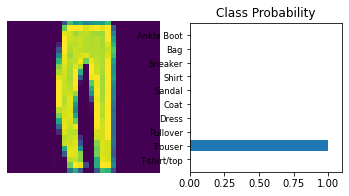

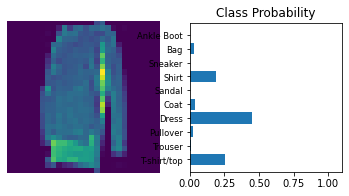

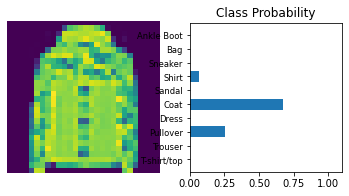

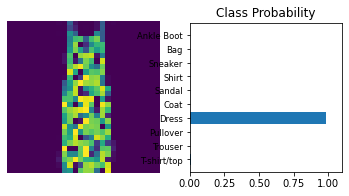

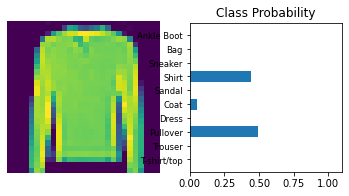

In [62]:

td = iter(testloader)

for _ in range(5):
  images, labels = next(td)
  print(images[2].shape[:])
  img = images[2].view(1, 784)
  with torch.no_grad():
    logps = model(img.cuda())
  
  ps = torch.exp(logps).cpu()
  probab = list (ps.numpy()[0])
  print("Predicted Class =", probab.index(max(probab)))
  view_classify(img.view(1,28,28),ps)

In [ ]:
model.state_dict()

torch.save(model.state_dict(), 'checkpoint.pt')

torch.jit.script(model).save('model.pt')

In [119]:
import os
from PIL import Image
from array import *
from random import shuffle
import numpy as np
label_list=['T-shirt/top',
                      'Trouser',
                      'Pullover',
                      'Dress',
                      'Coat',
                      'Sandal',
                      'Shirt',
                      'Sneaker',
                      'Bag',
                      'Ankle Boot']
path = 'drive/MyDrive/uob_image_set'
classifier_list = []

with open('MNIST_label_data.txt','w') as f:

  for dirname in os.listdir(path):
    pathh = os.path.join(path,dirname,dirname+"_0.jpg")
    probab_total = np.zeros(10)
    data_image=[]
    Im = Image.open(pathh)
    Im = Im.resize((28,28),resample=0)
    pixel = Im.load()
    width, height = Im.size
    for x in range(0,width):
      for y in range(0,height):
        a=-sum(list(pixel[y,x]))/3/255*2+1
        data_image.append(a)
    
    img = torch.FloatTensor(data_image)
    img=torch.reshape(img, (1,28,28))
    with torch.no_grad():
      logps = model(img.cuda())
    
    ps = torch.exp(logps).cpu()
    probab = ps.numpy()[0]
    probab_total = probab_total+probab
    
    f.write(dirname+" "+label_list[list(probab_total).index(max(probab_total))]+"\n")
    
f.close()